# Site 1: Scottland
#### Nikola Vasiljevic, September 24th 2019

This notebook is used to derive results presented in Section 3.2 of the paper:<br>
**Digitalization of scanning lidar measurement campaign planning**<br>
The results are generated using the Python library *campaign-planning-tool* v0.1.3.

To be able to run this notebook user are requested to install *campaign-planning-tool*. 
<br>Use the following link for installation instructions: 
<br>https://github.com/niva83/campaign-planning-tool

In [1]:
from campaign_planning_tool import CPT
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt

Let us start by creating a CPT object and configuring storage and landcover data paths:

In [2]:
layout = CPT()
layout.set_path('../data/output/', path_type = 'output')
layout.set_path('../data/input/landcover/glc_V18_5.tif', path_type = 'landcover')

Path /Users/niva/Desktop/supplementary_material set for storing CPT outputs
Path /Volumes/Secondary_Drive/work/projects/campaign-planning-tool/examples/../data/input/landcover/glc_V18_5.tif set for landcover data


Before we proceed adding the measurement points it important to know that the CPT methods perform calculation in UTM coordinate system (i.e., positions provided as triplets Easting, Northing and Height). Therefore it is required to set a proper UTM zone to the class, which in our case is 30U. The digits in the UTM zone represent so-called latitudinal zone, while a character represent longitudinal zone. Both, digits and character are required to be provided to the CPT class:

In [3]:
layout.set_utm_zone('30U')

Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set


Now that we have set a proper UTM zone we can add our measurement point to the CPT class.
<br>In this example we use turbine hub positions as measurement points:

In [4]:
points = np.array([
[534989,6184410,47],
[535205,6184536,47],
[535523,6184458,47],
[535837,6184425,47],
[536008,6184602,47],
[536288,6184670,47],
[535150,6184166,47],
[535468,6184187,47],
[535119,6183722,47],
[535382,6183935,47],
[535646,6183803,47],
[535865,6183938,47],
[536172,6184027,47],
[536404,6184103,47],
[535465,6183116,47],
[535432,6183632,47],
[535707,6183551,47],
[535958,6183688,47],
[536209,6183662,47],
[535636,6183310,47],
[535661,6182950,47],
[535440,6182744,47]
])

Since CPT methods work with the height provided as the height above sea level, thus we need to add terrain height to the turbine hub height. 
<br>The CPT class has a method to fetch the terrain height from SRTM database:

In [5]:
points[:, 2] = points[:, 2] + layout.get_elevation('30U', points)

Correct latitudinal zone!
Correct longitudinal zone!


Now lets add the measurement points to the CPT class, specifically to the measurement point dictionary as *initial* measurements:

In [6]:
layout.add_measurement_instances('initial', points)

Measurement points 'initial' added to the measurements dictionary!
Measurements dictionary contains 1 different measurement type(s).


In [7]:
layout.measurements_dictionary['initial']

,Point no.,Easting [m],Northing [m],Height asl [m]
0,1,534989,6184410,323
1,2,535205,6184536,321
2,3,535523,6184458,335
3,4,535837,6184425,346
4,5,536008,6184602,341
5,6,536288,6184670,327
6,7,535150,6184166,338
7,8,535468,6184187,358
8,9,535119,6183722,347
9,10,535382,6183935,370


Before we start generating GIS layers which will help us navigate positioning of two lidars let us change the following attributes of the CPT class:
<br>
- *maximum allowed elevation angle*
<br>
- *expected average range of lidards*

In [8]:
layout.MAX_ELEVATION_ANGLE = 5 # in degrees
layout.AVERAGE_RANGE = 3000 # in meters

Now lets generate the GIS layer for placing of the first lidar. The method that we need to call is:
```
layout.generate_first_lidar_placement_layer(points_id)
```
where point_id is a string indicating which measurement points should be used in this process.
<br> We will set *points_id* to '*initial*' since we have previously added measurement points considering this id:

In [9]:
layout.generate_first_lidar_placement_layer('initial')

Generating combined layer for initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
First lidar placement layer generated with landcover data!


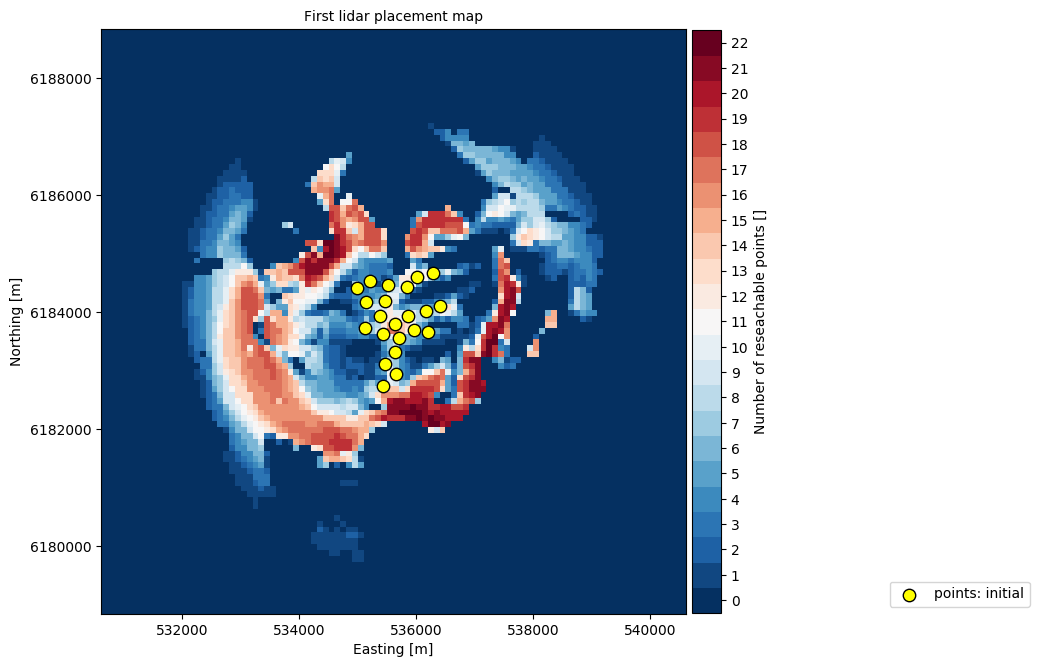

In [10]:
layout.plot_layer('first_lidar_placement', title = 'First lidar placement map')

The plot shows you areas where if you place lidar you will be able to reach a certain number of measurement points considering a number of constriants such as:
* Range
* Unobstracted line-of-sight
* Elevation angle
* Restriction zones 

Currently the CPT library don't provide an interactive way of placing lidar or optimization routine to do this for you. <br>Therefore, for time being you will have to this manually.<br>

You have two options of performing this task. <br>
You can export the above layer to KML by using following built-in method:
```
layout.lidar_position_suggestion(filename, **kwargs)
```
You can use another built-in method to get a list of potential positions:<br>
```
layout.lidar_position_suggestion(layer_id, teshold)
```
We will demonstrate both methods:<br>

In [11]:
layout.export_kml('first_lidar', layer_ids = ['first_lidar_placement'])
first_lidar_positions = layout.lidar_position_suggestion('first_lidar_placement', 22)

KML exported successful!


In the first method we are providing the KML file name followed with *layer_id* suppiled as a list.<br>
In the second method we provide *layer_id* string followed with a *treshold* provided as an integer. <br> 
The treshold represents a minimum number of measurement points the suggested lidar position should be able to provide considering all the constraints. <br>In our case, we want only locations which will allow us to reach all 22 measurement points. 
<br>
Nevertheless, in this example, using Google Earth we have identified position for the first lidar and add it to the lidar dictionary:

Lidar 'ws1' added to the lidar dictionary, which now contains 1 lidar instance(s).
Updating lidar instance 'ws1' considering GIS layer 'first_lidar_placement'.


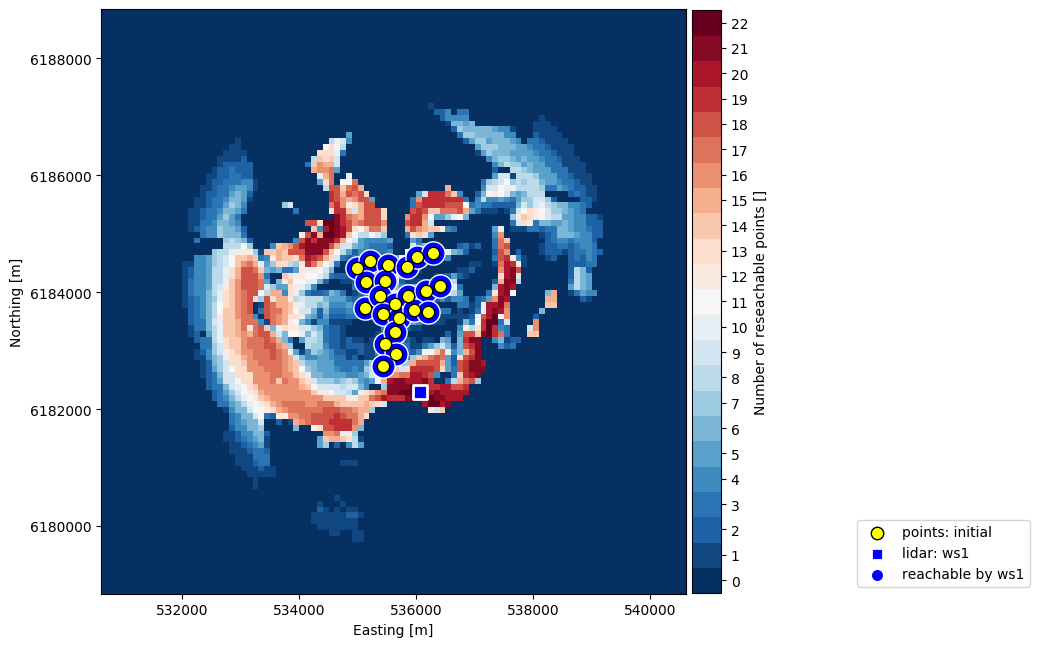

In [12]:
layout.add_lidar_instance('ws1', np.array([536062, 6182292, 350]), layer_id = 'first_lidar_placement')
layout.plot_layer('first_lidar_placement', lidar_ids = ['ws1'])

What happened in the previous two lines of code? 
<br>First we call method
```
layout.add_lidar_instance(lidar_id, position, kwargs)
```
which adds lidar position to the lidar dictionary.<br>
In our case we provided this method with following parameters:
* lidar_id ='*ws1*'
* position, which was identified by inspecting GIS layer in Google Earth
* layer_id = '*first_lidar_placement*'

The last parameter points the method to extract information about the reachable points from a specific GIS layer, which in the case of the first lidar placement is *'first_lidar_placement'* and updates the lidar dictionary instance 'ws1' accordingly. <br>
You can access the lidar dictionary instance by calling:
```
layout.lidar_dictionary['ws1']
```
, and if you inspect specifically the following key:
```
layout.lidar_dictionary['ws1']['reachable_points']
```
you can see that the returned array contains 22 elements (same lenght as points) and all elements are equal to 1 since all measurement points are reachable. Otherwise, if a point is unreachable by the lidar in the dictionary this will be indicated with 0. <br>Inspect other elements of the lidar dictionary. We will use them at the later stage.

In [13]:
layout.lidar_dictionary['ws1']['reachable_points']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

Since we have selected the first lidar position, let's add the second lidar. 
<br>Now we need to add one more contraint, which is the minimum intersecting angle between laser beams.
By calling 
```
layout.MIN_INTERSECTING_ANGLE
```
you can see what is the preset value in degrees.<br>
For time being we will use the default value of 30 degrees and create so called <br>*'additional lidar placement layer'*
<br> To do this we will call method 
```
layout.generate_additional_lidar_placement_layer(lidar_id)
```
where *lidar_id* will be set to *'ws1'*, since that is the id of our first lidar.

Updating lidar instance 'ws1' considering GIS layer 'first_lidar_placement'.


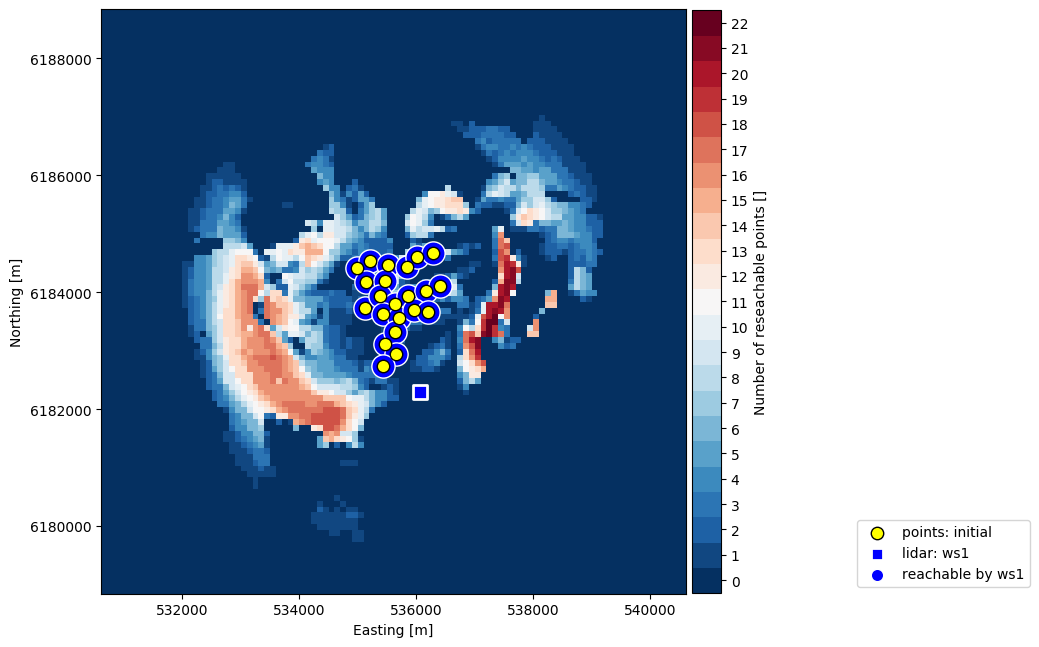

In [14]:
layout.generate_additional_lidar_placement_layer('ws1')
layout.plot_layer('additional_lidar_placement', lidar_ids = ['ws1'])

In the above plot of the new GIS layer you can see that some areas which in the previous plot were indicated as a good areas for lidar installation are removed. The reason for this is that if the second lidar was placed at those areas the intersecting angle between the first and second lidar would be lower than 30 degrees.
<br>
Again we can export this newly made layer to KML file or use the internal method to suggest us the best positions for the second lidar:

In [15]:
layout.export_kml('second_lidar', layer_ids = ['additional_lidar_placement'])
second_lidar_positions = layout.lidar_position_suggestion('additional_lidar_placement', 22)

KML exported successful!


Lidar 'ws2' added to the lidar dictionary, which now contains 2 lidar instance(s).
Updating lidar instance 'ws2' considering GIS layer 'additional_lidar_placement'.


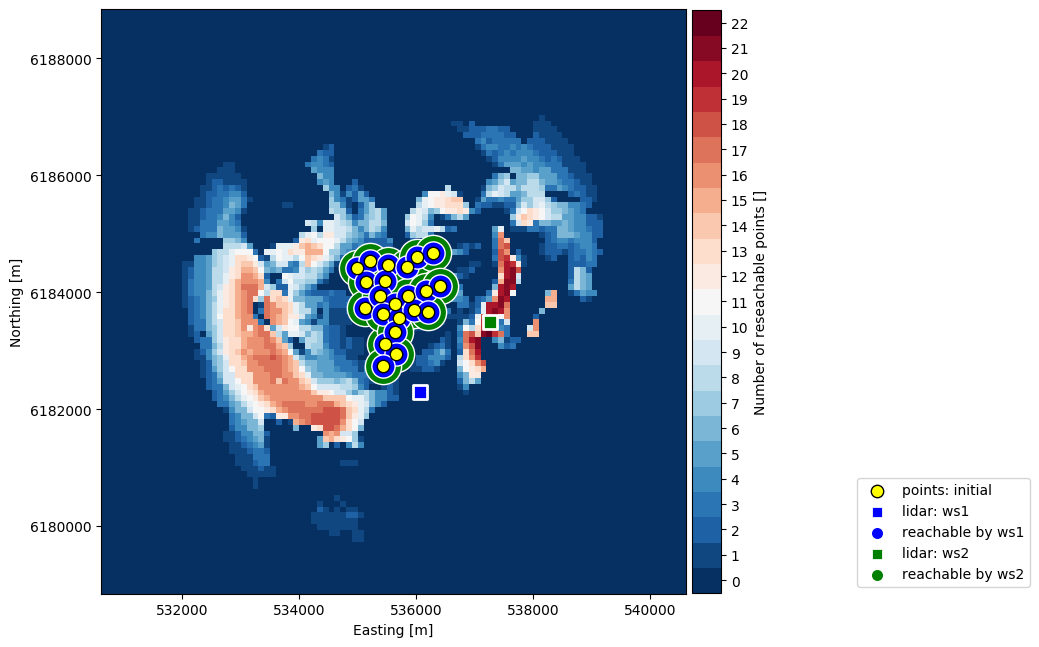

In [16]:
layout.add_lidar_instance('ws2', np.array([537262, 6183492, 304]),layer_id = 'additional_lidar_placement')  
layout.plot_layer('additional_lidar_placement', lidar_ids = ['ws1', 'ws2'])

At this point we have positions of our dual-Doppler system and we are ready to optimize trajectory, plot campaign design and export lidars configurations. We will use the following built-in methods for this:<br>
```
layout.optimize_trajectory(lidar_ids, **kwargs)
layout.plot_design(layer_id, lidar_ids, **kwargs)
layout.export_measurement_scenario(layer_id)
```
Additionally we will export KML containing layers, lidar positions and trajectory:<br>
```
layout.export_kml(filename, **kwargs)
```

In [17]:
layout.optimize_trajectory(['ws1', 'ws2'], sync = True, only_common_points = True)

Lidar instances:['ws1', 'ws2'] will be updated with the optimized trajectory
Synchronizing trajectories for lidar instances:['ws1', 'ws2']


In this method we set kwargs *sync* and *only_common_points* to True. The first kwarg will assure synchronized trajectories, while the second kwarg assure that trajectory will consider only measurement points reachable by both lidars. The optimize_trajectory method currently only generates step-stare trajectories. <br>
You can access lidar dictionary and the result of this method (i.e., access key 'motion_config').

In [18]:
layout.lidar_dictionary['ws1']['motion_config']

,Step-stare order,Azimuth [deg],Elevation [deg],Move time [ms]
0,22->1,324.08,0.11,851.0
1,1->2,328.64,0.07,525.0
2,2->3,337.29,0.67,702.0
3,3->4,344.25,1.45,586.0
4,4->5,344.61,1.21,591.0
5,5->6,337.52,0.64,533.0
6,6->7,334.05,-0.33,422.0
7,7->8,333.13,-0.65,415.0
8,8->9,339.10,-0.69,489.0
9,9->10,342.60,0.23,479.0


In [19]:
layout.lidar_dictionary['ws2']['motion_config']

,Step-stare order,Azimuth [deg],Elevation [deg],Move time [ms]
0,22->1,258.18,1.50,851.0
1,1->2,251.30,1.59,525.0
2,2->3,263.61,2.07,702.0
3,3->4,272.17,2.91,586.0
4,4->5,280.89,2.75,591.0
5,5->6,283.26,1.96,533.0
6,6->7,287.70,0.88,422.0
7,7->8,291.99,0.44,415.0
8,8->9,296.91,0.42,489.0
9,9->10,291.18,1.61,479.0


In [20]:
layout.lidar_dictionary['ws2']['trajectory']

,Point no.,Easting [m],Northing [m],Height asl [m]
0,1,535465,6183116,352
1,2,535661,6182950,351
2,3,535636,6183310,363
3,4,535707,6183551,383
4,5,535646,6183803,383
5,6,535382,6183935,370
6,7,535150,6184166,338
7,8,534989,6184410,323
8,9,535205,6184536,321
9,10,535468,6184187,358


Trajectory motion time [s]: 13.95


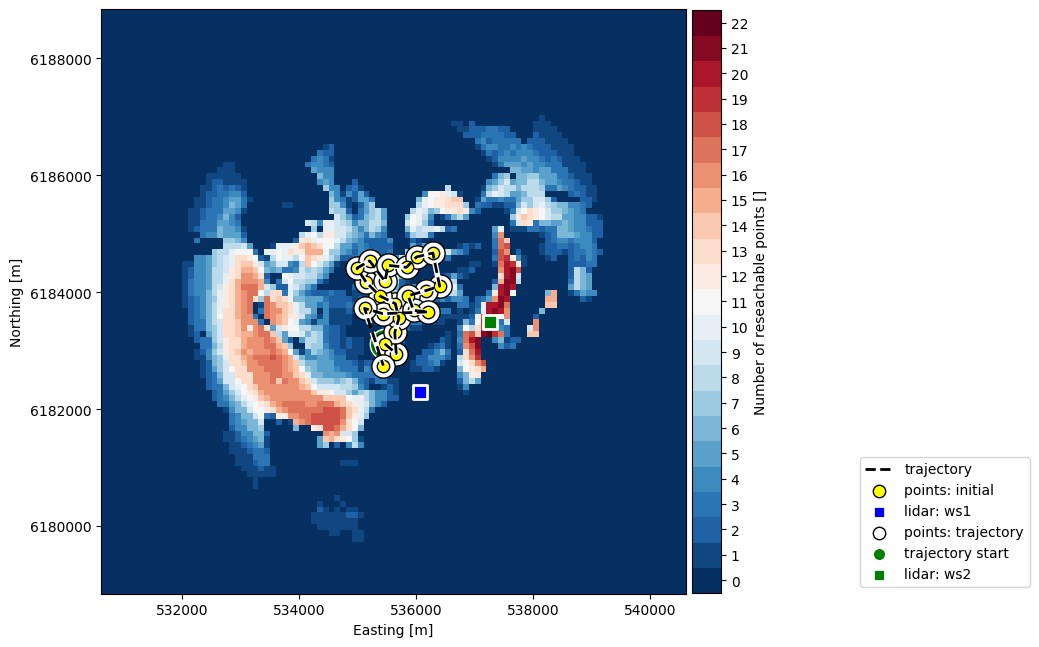

In [21]:
print('Trajectory motion time [s]: ' 
      + str(round(np.sum(layout.lidar_dictionary['ws1']['motion_config'].values[:,-1])/1000,2)))
layout.plot_design('additional_lidar_placement', lidar_ids = ['ws1', 'ws2'])

In [22]:
layout.export_measurement_scenario(['ws1', 'ws2'])
layout.export_kml('campaign_desing', 
                  layer_ids = ['first_lidar_placement','additional_lidar_placement'],
                  lidar_ids = ['ws1', 'ws2'])

Measurement scenario export successful!
KML exported successful!


The last method will export following files:
1. Motion program to drive scanner heads (PMC file)
2. Range gate file to configure laser and FPGA (TXT file)
3. YAML and XML files containing human and machine readable compilation of information from (1) and (2)

Motion programs and range gate files are currently only applicable for [long-range WindScanners](https://www.mdpi.com/2072-4292/8/11/896).
<br>Now you are all equiped to make scanning lidar measurements!

## Appendix: verification of the optimized trajectory
For the purpose of verifying that the optimized trajectory is really the shortest in duration we would need to generate all possible trajectories by making permutation of trajectory points. In this example this is not feasible since the trajectory contains 22 measurement points, thus there is 22! = 10^21 possible trajectories. Instead, we will make generate randomly 10^6 trajectories and calculate their timing.

In [51]:
trajectory_init = layout.trajectory.values[:,1:].tolist()
lidar_ids= ['ws1', 'ws2']

In [54]:
i = 10**6
no_it = i
j = 0
sync_time_list = []
while(i>0):
    i = i - 1
    j = j + 1
    
    shuffle(trajectory_init)
    trajectory = np.asarray(trajectory_init)
    
    sync_time = []
    for lidar in lidar_ids:

        motion_table = layout.generate_trajectory(
                layout.lidar_dictionary[lidar]['position'], 
                trajectory)

        timing = motion_table.loc[:, 'Move time [ms]'].values
        sync_time = sync_time + [timing]
        
    # Synchronize the trajectory time for two lidars
    # by taking the maximum move time between two of them
    # for each trajectory point:        
    sync_time = np.sum(np.max(np.asarray(sync_time).T, axis = 1))
    sync_time_list = sync_time_list + [sync_time]   
    print("Progress {:2.1%}".format(j / no_it), end="\r")
sync_time_list = np.asarray(sync_time_list)

Average time: 	22.09 s
Max time: 	25.76 s
Min time: 	17.15 s
Std: 		1.03 s


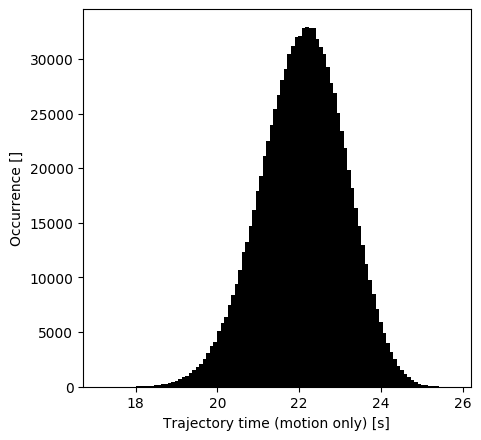

In [55]:
print('Average time: \t' + str(round(np.mean(sync_time_list)/1000,2)) +' s')
print('Max time: \t' + str(round(np.max(sync_time_list)/1000,2)) +' s')
print('Min time: \t' + str(round(np.min(sync_time_list)/1000,2)) +' s')
print('Std: \t\t' + str(round(np.std(sync_time_list)/1000,2)) +' s')


fig, ax = plt.subplots(sharey = True, 
                        figsize=(500/layout.MY_DPI, 
                                500/layout.MY_DPI), 
                        dpi=layout.MY_DPI)
n, bins, patches = plt.hist(sync_time_list/1000, 100, facecolor='black', alpha=1)
plt.xlabel('Trajectory time (motion only) [s]', fontsize = layout.FONT_SIZE)
plt.ylabel('Occurrence []', fontsize = layout.FONT_SIZE)

plt.show()